<a href="https://colab.research.google.com/github/dawoodwasif/Digital-Image-Processing-Techniques/blob/main/DIP_Lab5_Connected_Components.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task: **Implement Connected Components Algorithm**

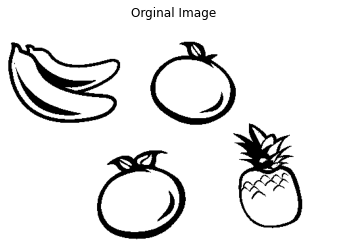

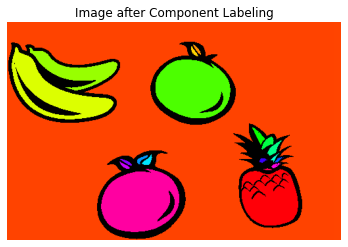

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def connected_component_label(path):
    
    # Getting the input image
    img = cv2.imread(path, 0)
    # Converting those pixels with values 1-127 to 0 and others to 1
    img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)[1]
    # Applying cv2.connectedComponents() 
    num_labels, labels = cv2.connectedComponents(img)
    
    # Map component labels to hue val, 0-179 is the hue range in OpenCV
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

    # Converting cvt to BGR
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0


  # Showing Original Image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Orginal Image")
    plt.show()
    
    #Showing Image after Component Labeling
    plt.imshow(cv2.cvtColor(labeled_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Image after Component Labeling")
    plt.show()

connected_component_label('Lab5-image.png')



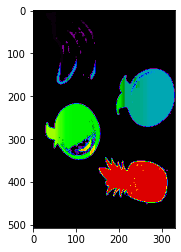

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

def count_ordered(input_arr):
    output_array=input_arr;
    current_tag=0;
    labels_array=[]
    for y in range(0, len(output_array)):
        row=output_array[y]
        for x in range(0,len(row)):
            if(output_array[y][x]==0):
                continue
            left_val=0
            top_val=0
            if(x>0):
                left_val=output_array[y][x-1]
            if(y>0):
                top_val=output_array[y-1][x]
            if(left_val==0 and top_val==0): #New block found
                current_tag+=1
                output_array[y][x]=current_tag
            elif(left_val!=0 and top_val!=0): #Overlap found
                if(left_val!=top_val):    
                    min_val=min(left_val,top_val)
                    max_val=max(left_val,top_val)
                    tuple_label=(min_val,max_val)
                    if(labels_array.count(tuple_label)==0):
                        labels_array.append((min_val,max_val))
                    output_array[y][x]=min_val
                else:
                    output_array[y][x]=left_val                
            elif(min(left_val,top_val)==0):
                output_array[y][x]=max(left_val,top_val)
            
            pass
        pass
        
    for y in range(0,len(output_array)):
        row=output_array[y]
        for x in range(0,len(row)):
            val=output_array[y][x]
            for link in labels_array:
                if(val==link[1]):
                    val=link[0]
                    output_array[y][x]=val
                pass
    return output_array


def binarize(img):
    # decide the threshold
    threshold = 203

    # load the pixels of the image
    pix = img.load()
    # get width and height of the input image
    width, height = img.size
    # iterate through all the pixels
    for x in range(width):
        for y in range(height):
            if pix[x, y] > threshold:
                pix[x, y] = 0
            else:
                pix[x, y] = 255
    return img


img=Image.open('Lab5-image.png').convert('L')

img=binarize(img)

pix=img.load()

width,height=img.size
arr=[]
for x in range(width):
        row=[]
        for y in range(height):
            row.append(pix[x,y])
        arr.append(row)


x=count_ordered(arr)
plt.imshow(x,cmap='nipy_spectral')
plt.show()